## PCM + NSGA II - 100 Indíviduos e 100 gerações para o modelo sem isolamento



### *Import* das bibliotecas

In [1]:
from besos import eppy_funcs as ef
from besos.problem import EPProblem
from besos.objectives import VariableReader, MeterReader
from besos.evaluator import EvaluatorEP
from besos.parameters import wwr, RangeParameter, FieldSelector, FilterSelector, GenericSelector, Parameter, expand_plist
from besos.optimizer import NSGAII, SPEA2
from platypus.evaluator import MapEvaluator
import platypus
import pandas as pd
import matplotlib.pyplot as plt
from platypus.evaluator import MapEvaluator
from datetime import datetime
from dask.distributed import Client

### Adição do modelo de simulação

In [2]:
building = ef.get_building('ZB3_VH_LSF_SI+PCM.idf') # Carregando o modelo do E+;

### Adição dos parâmetros utilizadas para análise multi-objetivo (variáveis) 

In [3]:
parameters = []

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",             # Classe do E+;
                    object_name="Gesso_acartonado com PCM",                          # Nome do objeto;
                    field_name="Latent Heat during the Entire Phase Change Process", # Campo do objeto;
                ),
                value_descriptor=RangeParameter(min_val=190000, max_val=315000)      # limites;
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="Liquid State Density",
                ),
                value_descriptor=RangeParameter(min_val=700, max_val=770)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="High Temperature Difference of Melting Curve",
                ),
                value_descriptor=RangeParameter(min_val=1, max_val=3)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="Peak Melting Temperature",
                ),
                value_descriptor=RangeParameter(min_val=18, max_val=35)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="Low Temperature Difference of Melting Curve",
                ),
                value_descriptor=RangeParameter(min_val=1, max_val=3)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="Solid State Density",
                ),
                value_descriptor=RangeParameter(min_val=760, max_val=880)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="High Temperature Difference of Freezing Curve",
                ),
                value_descriptor=RangeParameter(min_val=1, max_val=3)
                )
            )


parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="Peak Freezing Temperature",
                ),
                value_descriptor=RangeParameter(min_val=17, max_val=34)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIALPROPERTY:PHASECHANGEHYSTERESIS",
                    object_name="Gesso_acartonado com PCM",                 
                    field_name="Low Temperature Difference of Freezing Curve",
                ),
                value_descriptor=RangeParameter(min_val=1, max_val=3)
                )
            )

parameters.append(
            Parameter(
                selector=FieldSelector(
                    class_name="MATERIAL",
                    object_name="Gesso_acartonado com PCM",
                    field_name="Thickness", 
                ),
                value_descriptor=RangeParameter(min_val=0.0001, max_val=0.002)
                )
            )

### Seleção dos objetivos da análise

In [4]:
EPobjectives = ['Cooling:Electricity', 'Heating:Electricity']       # Heating e Cooling como objeivos;
problem = EPProblem(parameters, EPobjectives)                 # Criando uma instância do problema;

### Definição da função de avaliação e dos parâmetros do NSGA II + Tempo de execução

In [5]:
evaluator = EvaluatorEP(problem, building, epw="FlorianopolisTRY1963_05CSV.epw")   # Função de avaliação com o problema e o modelo;
startTime = datetime.now()
results = NSGAII(evaluator, evaluations=100, population_size=100)   # rodando o NSGA II;
print(datetime.now() - startTime)

8:24:09.968694


### Resultados

In [6]:
results

,Latent Heat during the Entire Phase Change Process,Liquid State Density,High Temperature Difference of Melting Curve,Peak Melting Temperature,Low Temperature Difference of Melting Curve,Solid State Density,High Temperature Difference of Freezing Curve,Peak Freezing Temperature,Low Temperature Difference of Freezing Curve,Thickness,Cooling:Electricity,Heating:Electricity,violation,pareto-optimal
0,198773.126530,741.056048,2.313488,23.944836,2.011126,853.662384,2.588235,28.121664,1.754886,0.001084,5.128575e+07,7.379047e+09,0,False
1,270594.139775,712.677546,1.730664,28.145049,2.971604,827.239405,2.163714,32.428334,2.216905,0.001533,1.898630e+08,7.404621e+09,0,False
2,307952.403161,723.959631,2.876665,33.213463,1.532497,826.154597,1.876574,18.476949,2.579331,0.001978,3.419024e+07,5.841490e+09,0,True
3,252853.072779,717.293381,1.024757,23.021304,1.517704,842.002140,1.657225,20.027192,2.130110,0.001689,4.060571e+07,5.680347e+09,0,True
4,296797.811504,714.437915,2.754535,18.093552,1.281650,863.423756,1.394022,19.436055,1.896539,0.001769,4.052996e+07,5.716538e+09,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,249133.643595,759.439612,1.203531,33.714363,2.421664,838.497800,2.065785,29.516136,1.290459,0.000399,5.222094e+07,7.467503e+09,0,False
96,208866.279424,734.141157,2.872119,29.007324,1.763615,836.135733,1.749563,30.940775,2.148096,0.001439,1.212134e+08,7.354944e+09,0,False
97,285805.681142,768.036167,1.894503,27.796709,1.373405,763.433950,1.213928,23.431047,1.417742,0.001311,4.082093e+07,6.700930e+09,0,False
98,305363.281894,749.593959,1.088002,34.288486,1.136620,780.908269,2.311177,30.853892,1.931608,0.000771,9.860391e+07,7.444719e+09,0,False


### Tratamento dos dados

In [7]:
results['Cooling:Electricity'] = (results['Cooling:Electricity']/3600000)/104.34 # Transformando J em EUI;
results['Heating:Electricity'] = (results['Heating:Electricity']/3600000)/104.34

results

,Latent Heat during the Entire Phase Change Process,Liquid State Density,High Temperature Difference of Melting Curve,Peak Melting Temperature,Low Temperature Difference of Melting Curve,Solid State Density,High Temperature Difference of Freezing Curve,Peak Freezing Temperature,Low Temperature Difference of Freezing Curve,Thickness,Cooling:Electricity,Heating:Electricity,violation,pareto-optimal
0,198773.126530,741.056048,2.313488,23.944836,2.011126,853.662384,2.588235,28.121664,1.754886,0.001084,0.136535,19.644769,0,False
1,270594.139775,712.677546,1.730664,28.145049,2.971604,827.239405,2.163714,32.428334,2.216905,0.001533,0.505460,19.712854,0,False
2,307952.403161,723.959631,2.876665,33.213463,1.532497,826.154597,1.876574,18.476949,2.579331,0.001978,0.091023,15.551430,0,True
3,252853.072779,717.293381,1.024757,23.021304,1.517704,842.002140,1.657225,20.027192,2.130110,0.001689,0.108102,15.122427,0,True
4,296797.811504,714.437915,2.754535,18.093552,1.281650,863.423756,1.394022,19.436055,1.896539,0.001769,0.107900,15.218777,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,249133.643595,759.439612,1.203531,33.714363,2.421664,838.497800,2.065785,29.516136,1.290459,0.000399,0.139025,19.880261,0,False
96,208866.279424,734.141157,2.872119,29.007324,1.763615,836.135733,1.749563,30.940775,2.148096,0.001439,0.322699,19.580601,0,False
97,285805.681142,768.036167,1.894503,27.796709,1.373405,763.433950,1.213928,23.431047,1.417742,0.001311,0.108675,17.839461,0,False
98,305363.281894,749.593959,1.088002,34.288486,1.136620,780.908269,2.311177,30.853892,1.931608,0.000771,0.262507,19.819604,0,False


### *Plot* dos resultados com os dados tratados

2    0.091023
3    0.108102
4    0.107900
Name: Cooling:Electricity, dtype: float64


(0.05, 0.9, 13.8, 20.5)

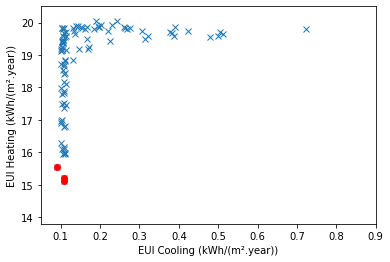

In [20]:
optres = results.loc[results['pareto-optimal']==True,:] # pareto-ótimo
print(optres['Cooling:Electricity'])
plt.plot(results['Cooling:Electricity'], results['Heating:Electricity'],'x') # Plot de todos os resultados em 'x'
plt.plot(optres['Cooling:Electricity'], optres['Heating:Electricity'],'ro') # Plot das melhores soluções em vermelho
plt.xlabel('EUI Cooling (kWh/(m².year))')
plt.ylabel('EUI Heating (kWh/(m².year))')
plt.axis([0.05,0.9,13.8,20.5]) #Seta a dimensão do grafico

In [21]:
optres

,Latent Heat during the Entire Phase Change Process,Liquid State Density,High Temperature Difference of Melting Curve,Peak Melting Temperature,Low Temperature Difference of Melting Curve,Solid State Density,High Temperature Difference of Freezing Curve,Peak Freezing Temperature,Low Temperature Difference of Freezing Curve,Thickness,Cooling:Electricity,Heating:Electricity,violation,pareto-optimal
2,307952.403161,723.959631,2.876665,33.213463,1.532497,826.154597,1.876574,18.476949,2.579331,0.001978,0.091023,15.551430,0,True
3,252853.072779,717.293381,1.024757,23.021304,1.517704,842.002140,1.657225,20.027192,2.130110,0.001689,0.108102,15.122427,0,True
4,296797.811504,714.437915,2.754535,18.093552,1.281650,863.423756,1.394022,19.436055,1.896539,0.001769,0.107900,15.218777,0,True
